### GPU/CPU Check

In [16]:
import tensorflow as tf
print(f"Tensorflow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
tf.config.list_physical_devices('GPU')


Tensorflow Version: 2.5.0
Keras Version: 2.5.0


[]

In [17]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [18]:
CheckList = ["GPU", "CPU"]
for device in CheckList:
    out_ = tf.config.list_physical_devices(device)    
    if len(out_) > 0:
        print(f"{device} is available")        
        print("details\n",out_)
    else:
        print(f"{device} not available")

GPU not available
CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## A simple classifier using Keras's Sequential API

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

In [20]:
# Loading fashion mnist data using Keras

mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [21]:
print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


In [22]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. 
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.



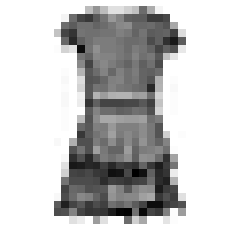

In [23]:
# lets view the first data point of X_train
plt.imshow(X_train[8], cmap="binary")
plt.axis('off')
plt.show()


<AxesSubplot:>

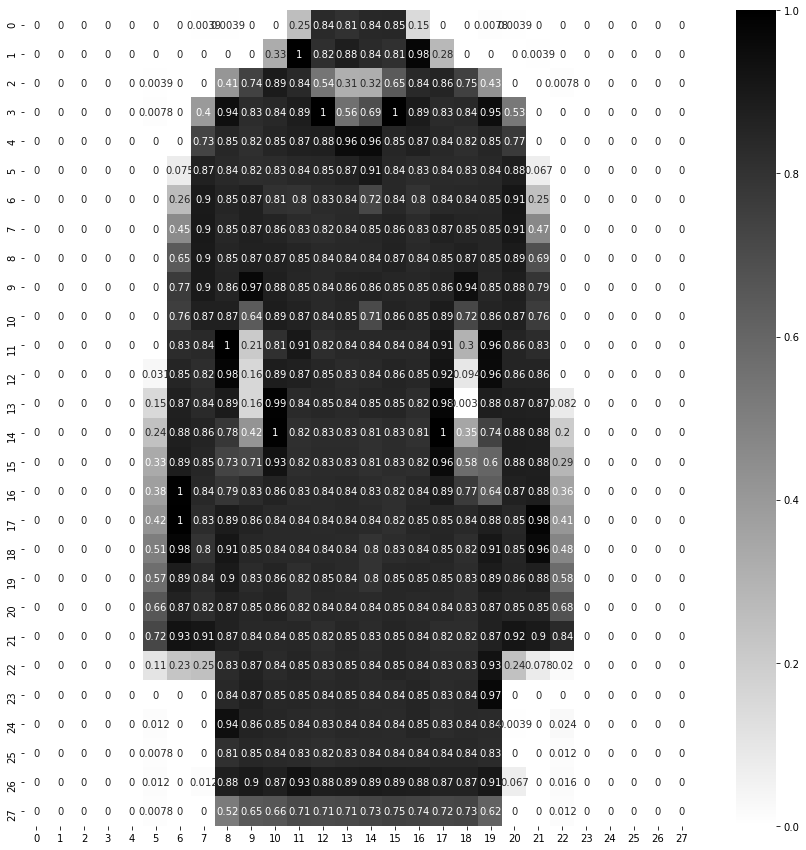

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[7], annot=True, cmap="binary")

In [25]:
# actual value of y_train
y_train[8]

3

In [26]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [27]:
model_clf.layers

In [28]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [30]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [31]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [32]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [33]:
# hidden1.set_weights(hidden1.get_weights()) # to set weights

In [34]:
type(hidden1.get_weights())

list

In [35]:
hidden1.get_weights()

[array([[-0.06930424,  0.02108531, -0.02868381, ..., -0.01378872,
         -0.0032094 , -0.05317049],
        [ 0.0683362 ,  0.00621836, -0.02600758, ...,  0.06853168,
          0.03508244, -0.03943756],
        [-0.05099151, -0.03014852,  0.04884873, ...,  0.03781901,
          0.00091056, -0.04901093],
        ...,
        [ 0.03878623, -0.00866383,  0.05716933, ..., -0.02918852,
          0.00949805,  0.04519016],
        [-0.05657118, -0.04653326,  0.05474721, ...,  0.05372413,
          0.06117687, -0.02550182],
        [ 0.02747642,  0.05471274,  0.00719149, ..., -0.03251506,
          0.06067903,  0.04905403]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [36]:
weights, biases = hidden1.get_weights()

In [37]:
print("shape\n",weights.shape, "\n")

weights


shape
 (784, 300) 



array([[-0.06930424,  0.02108531, -0.02868381, ..., -0.01378872,
        -0.0032094 , -0.05317049],
       [ 0.0683362 ,  0.00621836, -0.02600758, ...,  0.06853168,
         0.03508244, -0.03943756],
       [-0.05099151, -0.03014852,  0.04884873, ...,  0.03781901,
         0.00091056, -0.04901093],
       ...,
       [ 0.03878623, -0.00866383,  0.05716933, ..., -0.02918852,
         0.00949805,  0.04519016],
       [-0.05657118, -0.04653326,  0.05474721, ...,  0.05372413,
         0.06117687, -0.02550182],
       [ 0.02747642,  0.05471274,  0.00719149, ..., -0.03251506,
         0.06067903,  0.04905403]], dtype=float32)

In [38]:
print("shape\n", biases.shape)

biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [39]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)



In [27]:
# 1719*30, X_train.shape, 55000/32, batch size=32 by default

In [40]:
import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  log_path = os.path.join(log_dir, fileName)
  print(f"saving logs at: {log_path}")
  return log_path

log_dir = get_log_path()

tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

saving logs at: logs/fit\log_2021_06_06_12_19_02


In [41]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

In [42]:
##Model Checkpointing Callback

In [43]:
CKPT_path="model_ckpt.h5"
checkpointing_cb=tf.keras.callbacks.ModelCheckpoint(CKPT_path,save_best_only=True)

In [45]:
EPOCHS = 100
VALIDATION_SET = (X_valid, y_valid)
#ckpt_model=tf.keras.models.load_model(CKPT_path)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])


Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2120 - accuracy: 0.9235 - val_loss: 0.3002 - val_accuracy: 0.8930
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2095 - accuracy: 0.9245 - val_loss: 0.2890 - val_accuracy: 0.8974
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2059 - accuracy: 0.9259 - val_loss: 0.2835 - val_accuracy: 0.9004
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2029 - accuracy: 0.9271 - val_loss: 0.2889 - val_accuracy: 0.8948
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1995 - accuracy: 0.9277 - val_loss: 0.2946 - val_accuracy: 0.8936
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1960 - accuracy: 0.9290 - val_loss: 0.3009 - val_accuracy: 0.8928
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1934 - accuracy: 0.9307 - val_loss: 0.2890 - val_ac

In [46]:
ckpt_model=tf.keras.models.load_model(CKPT_path)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb,early_stopping_cb,checkpointing_cb])


Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1731 - accuracy: 0.9386 - val_loss: 0.2923 - val_accuracy: 0.8946
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1696 - accuracy: 0.9404 - val_loss: 0.2834 - val_accuracy: 0.9008
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1676 - accuracy: 0.9395 - val_loss: 0.2874 - val_accuracy: 0.8958
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1646 - accuracy: 0.9417 - val_loss: 0.2795 - val_accuracy: 0.9010
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1627 - accuracy: 0.9425 - val_loss: 0.2917 - val_accuracy: 0.9008
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1595 - accuracy: 0.9434 - val_loss: 0.2947 - val_accuracy: 0.8966
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1578 - accuracy: 0.9437 - val_loss: 0.2958 - val_ac

In [47]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path


In [48]:
UNIQUE_PATH = model_clf.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS\Model_2021_06_06_12_25_05_.h5


In [50]:
history.params


{'verbose': 1, 'epochs': 100, 'steps': 1719}

In [51]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.173061,0.938600,0.292277,0.8946
1,0.169591,0.940364,0.283375,0.9008
2,0.167629,0.939527,0.287367,0.8958
3,0.164588,0.941745,0.279469,0.9010
4,0.162686,0.942509,0.291681,0.9008
5,0.159460,0.943418,0.294709,0.8966
6,0.157849,0.943691,0.295790,0.8938
7,0.154236,0.945473,0.304944,0.8952
8,0.151319,0.945491,0.320850,0.8936


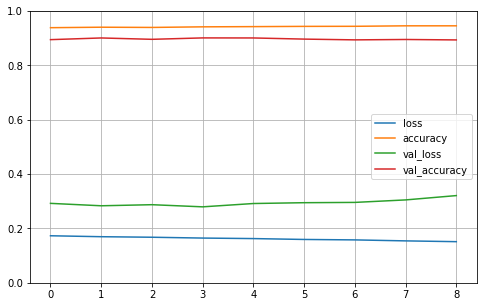

In [52]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [53]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3229 - accuracy: 0.8890


[0.3228980600833893, 0.8889999985694885]

In [54]:
X_new = X_test[:5]
y_proba = model_clf.predict(X_new)
y_proba.round(2)

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. ]], dtype=float32)

In [55]:
y_pred = np.argmax(model_clf.predict(X_new), axis=-1)
y_pred

array([9, 2, 1, 1, 6], dtype=int64)

In [58]:
y_test_new = y_test[:5]

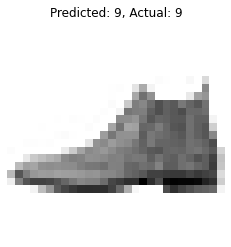

------------------------------------------------------------


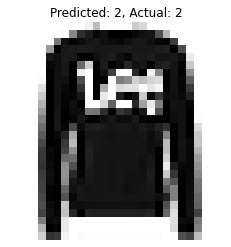

------------------------------------------------------------


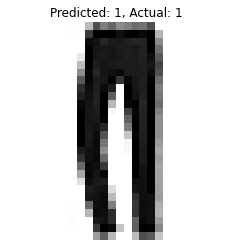

------------------------------------------------------------


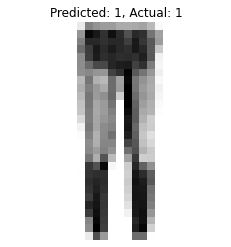

------------------------------------------------------------


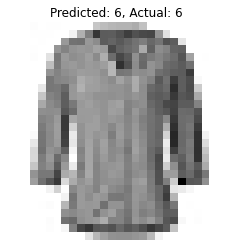

------------------------------------------------------------


In [59]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

In [60]:
weights, biases = hidden1.get_weights()


In [62]:
%load_ext tensorboard

In [63]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 6016), started 0:12:56 ago. (Use '!kill 6016' to kill it.)

<iframe src="https://slides.com/supremecommander/basic-neural-network/embed" width="576" height="420" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>

<iframe src="https://slides.com/supremecommander/basic-neural-network/embed" width="576" height="420" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>